In [74]:
# Initialize parameters for consistent use in aperture spectrum extraction

import scipy
import pylab
import numpy as np
import matplotlib
import astropy.io.fits as pyfits
import pyspeckit as psk
from astropy.wcs import WCS
import analysis as an
from analysis import lsq
import matplotlib.gridspec as gridspec

#Embed plots in Jupyter window
%matplotlib inline


#Set plot fonts
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', family='sans-serif')

radius = 2.2

#List of sources and their coordinates for extraction 
sources = pylab.array(['N1','N2'])
#N1 RA = 17 47 19.885, Dec = -28 22 19.417
#N2 RA = 17 47 19.877, Dec = -28 22 12.803
coords = pylab.array([[266.832854167,-28.3720602778],[266.832820833,-28.3702230556]])



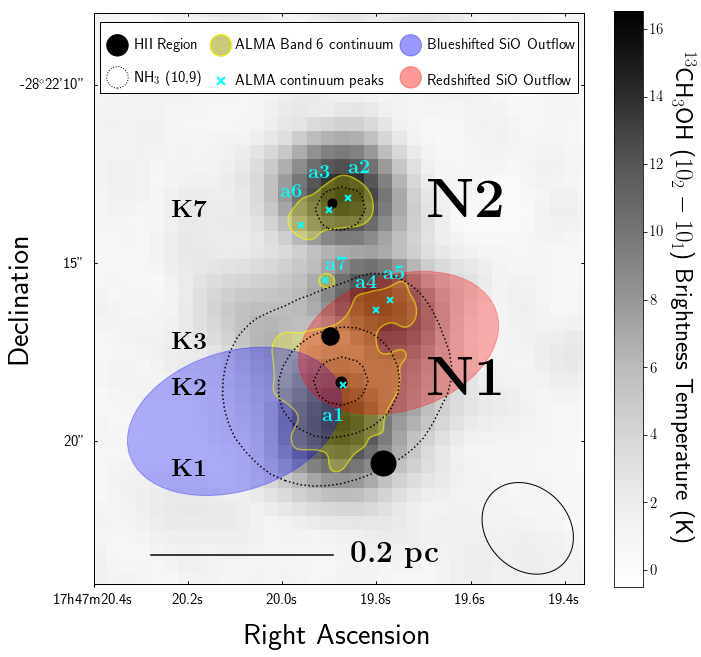

In [510]:
# Figure 4

from matplotlib.colors import ListedColormap

image1='SgrB2_Ka_13CH3OH_10-10.maximum.fits'
map1 = pyfits.getdata(image1)
header1 = pyfits.getheader(image1)
w1 = WCS(image1)
bmaj = header1["BMAJ"] * 3600
bmin = header1["BMIN"] * 3600
bpa2 = header1["BPA"] 
pixel = header1["CDELT1"] * 3600.0
rest= 27.88003


image2='SgrB2N_all_b04_continuum_drop.fits'
map2 = pyfits.getdata(image2)
header2 = pyfits.getheader(image2)
bmaj2 = header2["BMAJ"] * 3600
bmin2 = header2["BMIN"] * 3600
bpa = header1["BPA"] 

image3 ='SgrB2_K_NH3_10_9-10_9.maximum.fits'
map3 = pyfits.getdata(image3)
header3 = pyfits.getheader(image3)
bmaj3 = header3["BMAJ"] * 3600
bmin3 = header3["BMIN"] * 3600
bpa3 = header1["BPA"] 

image4 ='SGRB2_1.3CM_drop.fits'
map4 = pyfits.getdata(image4)
header4 = pyfits.getheader(image4)



zx1,zy1 = w1.all_world2pix(266.835,-28.3733333333,0)
zx2,zy2 = w1.all_world2pix(266.830666667,-28.3688888889,0)
x1,y1 = w1.all_world2pix(266.8375,-28.3755555556,0)
x2,y2 = w1.all_world2pix(266.828333333,-28.3666666667,0)
    
Jy_to_K = 1.224e6/(rest**2)/(bmaj*bmin)
map1 = map1 * Jy_to_K 
    
fig=pylab.figure(1,figsize=(10,9.5))
gs = gridspec.GridSpec(1,1)
#ax = pylab.subplot(projection=w1)
ax = fig.add_subplot(gs[0],projection=w1)


lon = ax.coords[0]
lat = ax.coords[1]

pylab.xlim(zx1,zx2)
pylab.ylim(zy1,zy2)

pink = pylab.cm.viridis
my_pink = pink(np.arange(pink.N)) 
my_pink[:,-1] = np.linspace(0, 1, pink.N)
my_pink = ListedColormap(my_pink)

#ax.imshow(map4,cmap='Greys',vmin=np.nanmin(map4),vmax=0.25*np.nanmax(map4),transform=ax.get_transform(WCS(header4)))
pylab.imshow(map1,cmap='Greys',vmin=np.nanmin(map1),vmax=1.1*np.nanmax(map1))
lon.set_major_formatter('hh:mm:ss.s')
lon.set_ticks(size=-3)
lat.set_ticks(size=-3)

pylab.text(zx1+18,zy1+1.5,s='{\\bf 0.2 pc}',fontsize=30,color='black')
pylab.plot((zx1+4,zx1+16.732),(zy1+2,zy1+2),color='black')

    
cb=pylab.colorbar()
cb.set_label(label='$^{13}$CH$_3$OH ($10_2-10_1$) Brightness Temperature (K)',fontsize=25,rotation=270,labelpad=30)

ax.contourf(map2,[0.1,2],colors='yellow',alpha=0.25,transform=ax.get_transform(WCS(header2)))
ax.contour(map2,[0.1],colors='yellow',transform=ax.get_transform(WCS(header2)),alpha=0.5)

ax.contour(map3,[0.04,0.17,0.3],colors='black',linestyles=':')

bx2,by2 = w1.all_world2pix(266.83445,-28.3729,0)
    
k1_x, k1_y = w1.all_world2pix(266.83244,-28.37239,0)
k3_x, k3_y = w1.all_world2pix(266.83291,-28.37140,0)
k2_x,k2_y = w1.all_world2pix(266.83281,-28.37176,0)
k7_x,k7_y = w1.all_world2pix(266.83289,-28.37037,0)

a1_x,a1_y = w1.all_world2pix(266.832791667,-28.3717861111,0)
a2_x,a2_y = w1.all_world2pix(266.83275,-28.370325,0)
a3_x,a3_y = w1.all_world2pix(266.832916667,-28.3704222222,0)
a4_x,a4_y = w1.all_world2pix(266.8325,-28.3712,0)
a5_x,a5_y = w1.all_world2pix(266.832375,-28.3711222222,0)
a6_x,a6_y = w1.all_world2pix(266.833166667,-28.3705388889,0)
a7_x,a7_y = w1.all_world2pix(266.832958333,-28.3709666667,0)

ax.plot(k1_x,k1_y,'.',color='black',ms=50)
ax.plot(k3_x,k3_y,'.',color='black',ms=35)
ax.plot(k2_x,k2_y,'.',color='black',ms=22)
ax.plot(k7_x,k7_y,'.',color='black',ms=18)
ax.plot(a1_x,a1_y,'x',color='cyan',ms=6,mew=2)
ax.plot(a2_x,a2_y,'x',color='cyan',ms=6,mew=2)
ax.plot(a3_x,a3_y,'x',color='cyan',ms=6,mew=2)
ax.plot(a4_x,a4_y,'x',color='cyan',ms=6,mew=2)
ax.plot(a5_x,a5_y,'x',color='cyan',ms=6,mew=2)
ax.plot(a6_x,a6_y,'x',color='cyan',ms=6,mew=2)
ax.plot(a7_x,a7_y,'x',color='cyan',ms=6,mew=2)

pylab.text(482,k1_y-1,'{\\bf K1}',fontsize=25,color='black')
pylab.text(482,k3_y-1,'{\\bf K3}',fontsize=25,color='black')
pylab.text(482,k7_y-1,'{\\bf K7}',fontsize=25,color='black')
pylab.text(482,k2_y-1,'{\\bf K2}',fontsize=25,color='black')
pylab.text(500,k7_y-1,'{\\bf N2}',fontsize=55,color='black')
pylab.text(500,k2_y-1,'{\\bf N1}',fontsize=55,color='black')
pylab.text(a1_x-1.5,a1_y-2.5,'{\\bf a1}',fontsize=20,color='cyan')
pylab.text(a2_x,a2_y+1.75,'{\\bf a2}',fontsize=20,color='cyan')
pylab.text(a3_x-1.5,a3_y+2.25,'{\\bf a3}',fontsize=20,color='cyan')
pylab.text(a4_x-1.5,a4_y+1.5,'{\\bf a4}',fontsize=20,color='cyan')
pylab.text(a5_x-0.5,a5_y+1.5,'{\\bf a5}',fontsize=20,color='cyan')
pylab.text(a6_x-1.5,a6_y+2,'{\\bf a6}',fontsize=20,color='cyan')
pylab.text(a7_x,a7_y+0.75,'{\\bf a7}',fontsize=20,color='cyan')

ax.set_ylabel('Declination',fontsize=30,labelpad=0)
ax.set_xlabel('Right Ascension',fontsize=30,labelpad=1)
ax.add_patch(
            matplotlib.patches.Ellipse(
                (507,by2),#(729.7,59.1),#200-140.9 #(715, 45),
                bmaj/pixel,bmin/pixel,angle=bpa+90,#0.01666,
                fill=False,     # remove background
                edgecolor='black',facecolor='white'
            )
)
#ax.add_patch(
#            matplotlib.patches.Ellipse(
#                (507,by2),#(729.7,59.1),#200-140.9 #(715, 45),
#                bmaj3/pixel,bmin3/pixel,angle=bpa3+90,#0.01666,
#                fill=False,ls=':' ,     # remove background
#                edgecolor='black',facecolor='white'
#            )
#)
#ax.add_patch(
#            matplotlib.patches.Ellipse(
#                (507,by2),#(729.7,59.1),#200-140.9 #(715, 45),
#                bmaj2/pixel,bmin2/pixel,angle=bpa2+90,#0.01666,
#                fill=True ,     # remove background
#                color='yellow'
#            )
#)

#OUTFLOWS
ax.add_patch(
            matplotlib.patches.Ellipse(
                (bx2+5.5,by2+7.5),#(729.7,59.1),#200-140.9 #(715, 45),
                2.2*bmaj/pixel,1.7*bmin/pixel,angle=bpa-27,#0.01666,
                fill=True ,     # remove background
                color='blue',alpha=0.3
            )
)
ax.add_patch(
            matplotlib.patches.Ellipse(
                (bx2+17,by2+13),#(729.7,59.1),#200-140.9 #(715, 45),
                2.05*bmaj/pixel,1.65*bmin/pixel,angle=bpa-27,#0.01666,
                fill=True ,     # remove background
                color='red',alpha=0.3
            )
)

#LEGEND
ax.add_patch(
            matplotlib.patches.Rectangle(
                (477,by2+30.5),#(729.7,59.1),#200-140.9 #(715, 45),
                33.5,5,
                fill=True,      # remove background
                edgecolor='black',facecolor='white'
            )
)  

#pylab.plot(478,697,'o',ms=12,color='black')
#pylab.plot(478,695,'o',ms=12,linestyle=':',mec='black',mfc='None')
ax.add_patch(
            matplotlib.patches.Circle(
                (478.25,695.25),0.75,fill=False,ls=':',lw=1,edgecolor='black'
                )
            )
ax.add_patch(
            matplotlib.patches.Circle(
                (478.25,697.5),0.75,fill=True,lw=1,color='black'
                )
            )
ax.add_patch(
            matplotlib.patches.Circle(
                (485.5,697.5),0.75,fill=True,lw=1,color='black',alpha=0.3
                )
            )
ax.add_patch(
            matplotlib.patches.Circle(
                (485.5,697.5),0.75,fill=True,lw=1,color='yellow',alpha=0.3
                )
            )
ax.add_patch(
            matplotlib.patches.Circle(
                (485.5,697.5),0.75,fill=False,lw=1,color='yellow'
                )
            )
pylab.plot(485.5,695,'x',color='cyan',ms=8,mew=2)
ax.add_patch(
            matplotlib.patches.Circle(
                (498.8,697.5),0.75,fill=True,lw=1,color='blue',alpha=0.4
                )
            )
ax.add_patch(
            matplotlib.patches.Circle(
                (498.8,695.25),0.75,fill=True,lw=1,color='red',alpha=0.4
                )
            )
pylab.text(479.5,697.25,'HII Region',fontsize=15)
pylab.text(479.5,694.75,'NH$_3$ (10,9)',fontsize=15)
pylab.text(486.5,697.25,'ALMA Band 6 continuum',fontsize=15)
pylab.text(486.5,694.75,'ALMA continuum peaks',fontsize=15)
pylab.text(500,697.25,'Blueshifted SiO Outflow',fontsize=15)
pylab.text(500,694.75,'Redshifted SiO Outflow',fontsize=15)

#pylab.tight_layout()
gs.tight_layout(fig,rect=[0.1, 0.1, 1, 1])
#pylab.plot(500,697,'o',ms=12,color='blue',alpha=0.3)
#pylab.plot(500,695,'o',ms=12,color='red',alpha=0.3)

pylab.savefig('/Users/EACMills/Dropbox/Papers/In_Progress/SgrB2/Fig4.pdf')